# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

### Desafio 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas.head()

vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = '%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format = '%Y-%m-%d')
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [4]:
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[['data_pedido', 'lucro']]
df_lucro_ano['ano'] = df_lucro_ano['data_pedido'].dt.year
df_lucro_ano.drop('data_pedido', axis = 1, inplace = True)

df_lucro_ano = df_lucro_ano.groupby('ano').agg('sum')
df_lucro_ano


,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


C:\Users\Giuliano\AppData\Local\Temp\ipykernel_13680\3621144820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y = 'lucro', palette = cores)


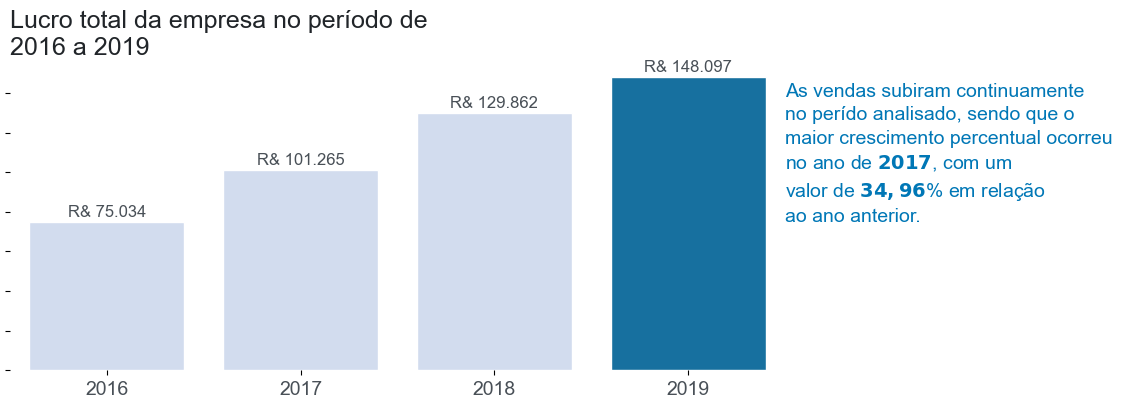

In [5]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.set_theme(style = 'white')

cores = []
for ano in df_lucro_ano.index:
    if df_lucro_ano.loc[ano, 'lucro'] == df_lucro_ano['lucro'].max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y = 'lucro', palette = cores)
ax.set_title('Lucro total da empresa no período de\n2016 a 2019', fontsize = 18, color = CINZA1, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)
ax.set_yticklabels([])

for i, valor in enumerate(df_lucro_ano['lucro']):
    qtd = f'R& {valor:,.0f}'.replace(',' , '.')
    offset = 0.5e4
    ax.text(i, valor + offset, qtd, fontsize = 12, color = CINZA2, ha = 'center', va = 'center')

ax.text(3.5, 0.75e5,
        'As vendas subiram continuamente\n'
        'no perído analisado, sendo que o\n'
        'maior crescimento percentual ocorreu\n'
        'no ano de $\\bf{2017}$, com um\n'
        'valor de $\\bf{34,96}$% em relação\n'
        'ao ano anterior.',
        fontsize = 14, linespacing = 1.4, color = AZUL2    
)

plt.show()

### Desafio 2

In [6]:
top_vendas = vendas.copy()
top_vendas = top_vendas[['tipo_produto', 'vendas']]
top_vendas = top_vendas.groupby('tipo_produto').agg('sum').sort_values('vendas', ascending = False)
top_10 = top_vendas[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


C:\Users\Giuliano\AppData\Local\Temp\ipykernel_13680\238159402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10, x = 'vendas', y = top_10.index, palette=cores)


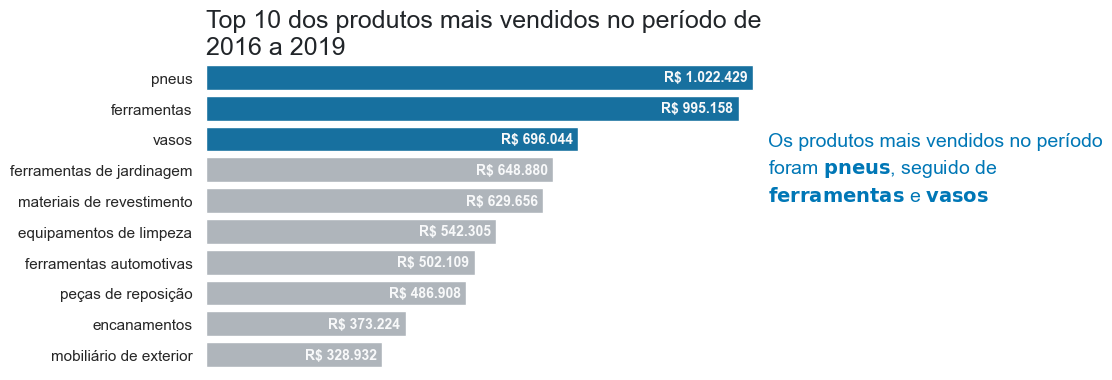

In [7]:
fig, ax = plt.subplots(figsize = (10, 4))
fig.subplots_adjust(right = 0.7)
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

ax = sns.barplot(data = top_10, x = 'vendas', y = top_10.index, palette=cores)
ax.set_title('Top 10 dos produtos mais vendidos no período de\n2016 a 2019', fontsize = 18, color = CINZA1, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
sns.despine(left = True, bottom = True)

for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')  
    offset = 1e4  
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

ax.text( 1.05e6, 4, 
        'Os produtos mais vendidos no período\n'
        'foram $\\bf{pneus}$, seguido de\n'
        '$\\bf{ferramentas}$ e $\\bf{vasos}$',

        fontsize=14, linespacing=1.45, color=AZUL2
)

plt.show()

## Aula 02 - Agrupando dados

### Desafio 1

In [8]:
df_vendas_co = vendas.copy()
df_vendas_co = df_vendas_co[['data_pedido', 'estado', 'regiao', 'vendas']]
df_vendas_co['data_pedido'] = pd.to_datetime(df_vendas_co['data_pedido'], format = '%Y-%m-%d')
df_vendas_co['ano'] = df_vendas_co['data_pedido'].dt.year
df_vendas_co.drop('data_pedido', axis = 1, inplace = True)
df_vendas_co.head()


,estado,regiao,vendas,ano
0,São Paulo,Sudeste,890.66,2018
1,São Paulo,Sudeste,2488.59,2018
2,Rio de Janeiro,Sudeste,49.72,2018
3,Paraná,Sul,3255.75,2017
4,Paraná,Sul,76.04,2017


In [9]:
sel = ((df_vendas_co['ano'] == 2017) | (df_vendas_co['ano'] == 2018)) & (df_vendas_co['regiao'] == 'Centro-Oeste')
vendas_co = df_vendas_co[sel]

vendas_co = pd.crosstab(index = vendas_co['ano'], columns = vendas_co['estado'], values = vendas_co['vendas'], aggfunc = 'sum') 
vendas_co


estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


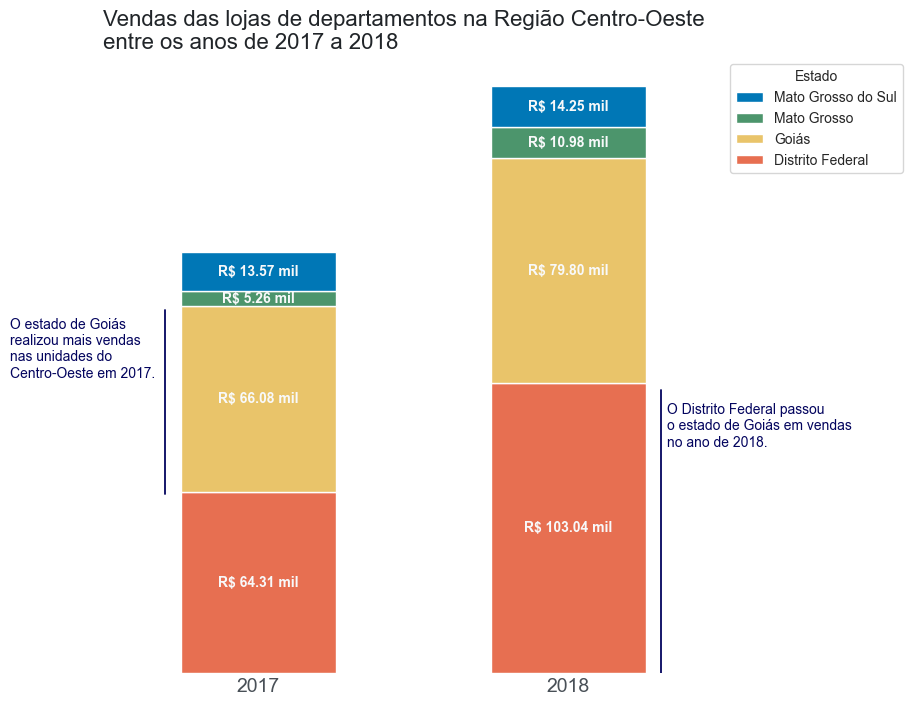

In [10]:
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

ax = vendas_co.plot(kind = 'bar', stacked = 'True', figsize = (8, 8), color = cores)
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018', fontsize = 16, loc = 'left', color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, rotation = 0, labelcolor = CINZA2)
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.legend(bbox_to_anchor = (1,1), reverse = True, title = 'Estado', title_fontsize = 10, fontsize = 10)

ax.axvline(x = -0.3, ymin = 0.29, ymax = 0.59, linewidth = 1.3, color = AZUL1)
ax.axvline(x = 1.3, ymin = 0, ymax = 0.46, linewidth = 1.3, color = AZUL1)

ax.text(-0.8, 1.05e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.', fontsize = 10, linespacing = 1.2, color = AZUL1)
ax.text(1.32, 8.05e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.', fontsize = 10, linespacing = 1.2, color = AZUL1)

for container in ax.containers:
    labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(',', '.') for valor in container]
    ax.bar_label(container, labels = labels, label_type = 'center', size = 10, color = CINZA5, fontweight = 'bold')

### Desafio 2

In [11]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


In [12]:
df_depart = vendas.copy()
df_depart = df_depart[['departamento', 'modo_envio']]

df_depart = pd.crosstab(index = df_depart['departamento'], columns = df_depart['modo_envio'], normalize = 'index')
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


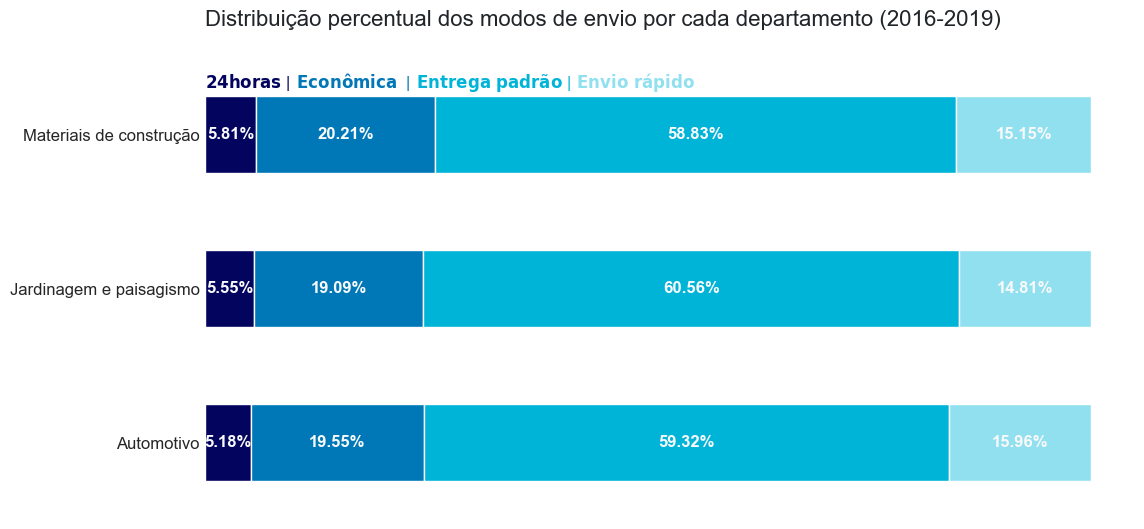

In [13]:
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

ax = df_depart.plot(kind = 'barh', stacked = True, figsize = (12, 6), color = cores, legend = None)
ax.set_title('Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n', loc = 'left', fontsize = 16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize = 12, color = CINZA2)
ax.tick_params(axis = 'both', which = 'both', length = 0)
ax.set_frame_on(False)

texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

for container in ax.containers:
    labels = [f'{valor.get_width() * 100:.2f}%' for valor in container]
    ax.bar_label(container, label_type = 'center', labels = labels, size = 12, color = CINZA5, fontweight = 'bold')


## Aula 03 - Séries de tempo

### Desafio 1

In [14]:
import matplotlib.dates as mdates

In [15]:
df_df = vendas.copy()
df_df['data_pedido'] = pd.to_datetime(df_df['data_pedido'], format = '%Y-%m%d')
df_df = df_df.query('estado == "Distrito Federal"')[['data_pedido', 'vendas']]
df_df.set_index('data_pedido', inplace = True)
df_df = df_df.resample('2Q', closed = 'left').agg('sum')
df_df.reset_index(inplace = True)
df_df.head()


,data_pedido,vendas
0,2016-06-30,20202.43
1,2016-12-31,39156.43
2,2017-06-30,16582.33
3,2017-12-31,50458.93
4,2018-06-30,54554.21


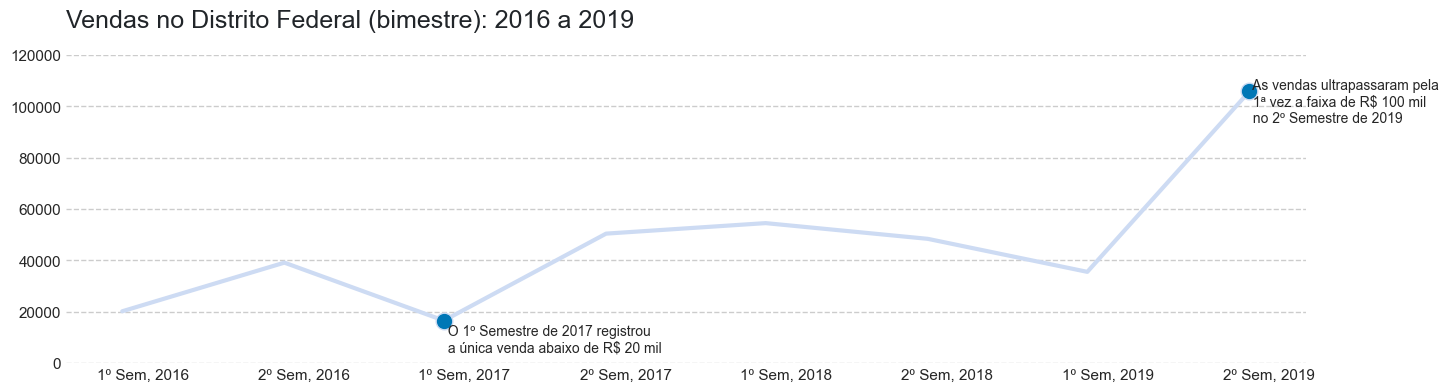

In [16]:
fix, ax = plt.subplots(figsize = (16,4))

vendas_min = df_df['vendas'].min()
vendas_max = df_df['vendas'].max()
valores = df_df['vendas'].values

pontos_a_marcar = list((valores == vendas_min) | (valores == vendas_max))

ax.plot(df_df['data_pedido'], df_df['vendas'], lw = 3, color = AZUL5, marker = 'o', markersize = 12, markerfacecolor = AZUL2, markevery = pontos_a_marcar)
ax.set_title('Vendas no Distrito Federal (bimestre): 2016 a 2019', fontsize = 18, loc = 'left', color = CINZA1, pad = 20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(axis = 'y', linestyle = '--')
ax.set_frame_on(False)
ax.tick_params(axis = 'both', which = 'both', length = 0)

plt.ylim(0, 1.2e5)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017", 
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels = labels, ha = 'left')

for x, y in zip(df_df['data_pedido'], df_df['vendas']):
  if y == vendas_min:
    ax.text(x, y = y - 1.2e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 20 mil", fontsize = 10)
  if y == vendas_max:
    ax.text(x, y = y - 1.2e4, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()


### Desafio 2

In [17]:
import plotly.express as px

In [18]:
df_nordeste = vendas.copy()
df_nordeste = df_nordeste.query('regiao == "Nordeste"')[['data_pedido', 'estado', 'lucro']]


df_nordeste = pd.crosstab(index = df_nordeste['data_pedido'], columns = df_nordeste['estado'], values = df_nordeste['lucro'], aggfunc = 'sum')

df_nordeste = df_nordeste.resample('Y').agg('sum')
df_nordeste = round(df_nordeste/1000, 2)
df_nordeste

estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [19]:
fig = px.line(df_nordeste, x = df_nordeste.index, y = df_nordeste.columns, markers = True, labels = {'estado': 'Estado'}) 

fig.update_layout(width = 1300, height = 600, font_family = 'DejaVu Sans', font_size = 15, font_color = CINZA2,
                  title_font_color = CINZA1, title_font_size = 24,
                  title_text = 'Lucro anual dos estados da região Nordeste' +
                               '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                               xaxis_title = '', yaxis_title = '', plot_bgcolor = CINZA5)   

fig.update_yaxes(tickprefix = 'R$ ', ticksuffix = ' mil')

labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals = df_nordeste.index)

fig.update_traces(mode = 'markers + lines', hovertemplate = '<b>Período:<b>: %{x}} <br> <b>Lucro:<b> %{y}')
fig.update_layout(hovermode = 'x unified')

fig.show()

c:\Users\Giuliano\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Aula 04 - Distribuindo dados

### Desafio 1

In [20]:
dados = pd.read_csv('pop_idade.csv')
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


Text(0.7, 0.5, 'Mediana: 35 anos')

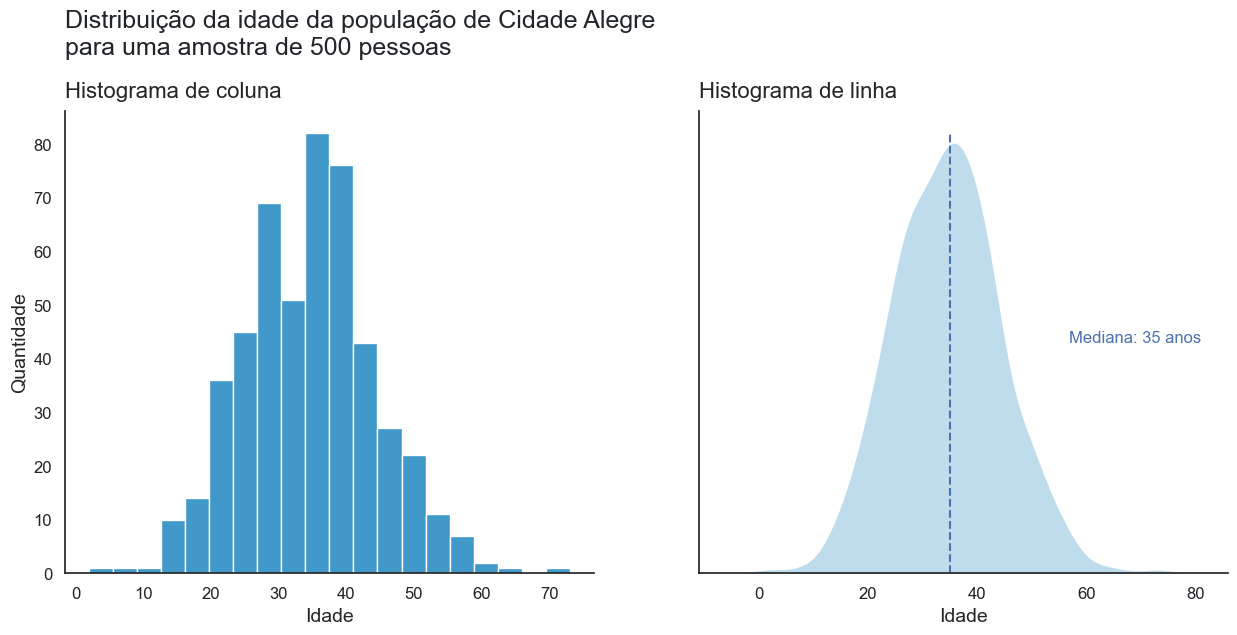

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
sns.set_theme(style = 'white')

fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas", 
             fontsize=18, color=CINZA1, x = 0.125, y = 1.05, ha="left")

sns.histplot(ax = axs[0], data = dados, x = 'idade', bins = 20, color = AZUL2)
sns.kdeplot(ax =axs[1], data = dados, x = 'idade', color = AZUL2, lw = 0, fill = True)

axs[0].set_title('Histograma de coluna', fontsize = 16, loc = 'left', pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].xaxis.set_tick_params(labelsize = 12, labelcolor = CINZA1)
axs[0].yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA1)

axs[1].set_title('Histograma de linha', fontsize = 16, loc = 'left', pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].set_yticklabels([])
axs[1].xaxis.set_tick_params(labelsize = 12, labelcolor = CINZA1)
axs[1].yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA1)

sns.despine()
mediana = dados['idade'].median()

axs[1].vlines(x = dados['idade'].median(), ymin = 0, ymax = 0.04, color = 'b', lw = 1.5, linestyles = '--')
axs[1].text(0.7, 0.5, f'Mediana: {mediana:.0f} anos', color = 'b', transform = axs[1].transAxes)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

### Desafio 2

In [23]:
from matplotlib.patches import Ellipse

vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")


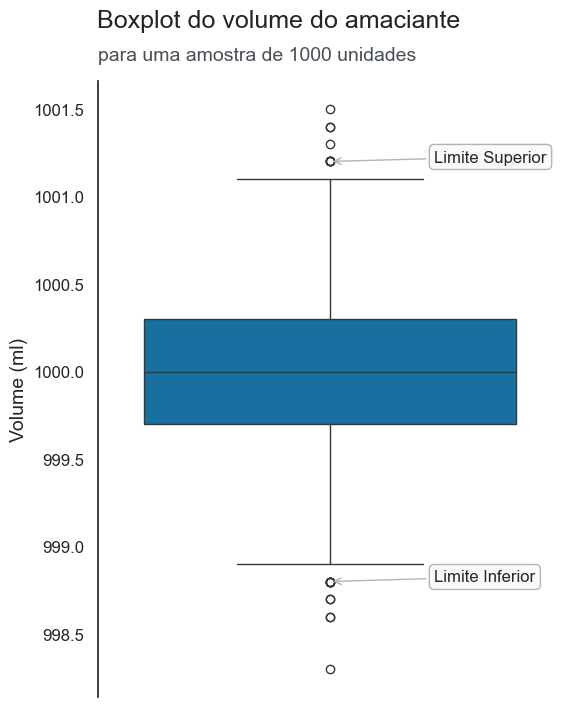

In [24]:
fix, ax = plt.subplots(figsize = (6, 8))
sns.set_theme(style = 'white')

ax = sns.boxplot(data = vol_amaciante, y = 'Volume', orient = 'v', color = AZUL2)
plt.suptitle('Boxplot do volume do amaciante', size = 18, color = CINZA1, ha = 'right', x = 0.73, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize = 14, color = CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA1)
sns.despine(bottom = True)

Q1 = vol_amaciante['Volume'].quantile(0.25)
Q2 = vol_amaciante['Volume'].median()
Q3 = vol_amaciante['Volume'].quantile(0.75)
IIQ = Q3 - Q1

limite_superior = Q3 + 1.5 * IIQ
limite_inferior = Q1 - 1.5 * IIQ

ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(75, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("Limite Inferior", xy = (0, limite_inferior), xycoords = 'data',
            bbox = dict(boxstyle = 'round', fc= CINZA5, ec = CINZA3),
            xytext = (75, 0), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = "->", color = CINZA3))

plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image


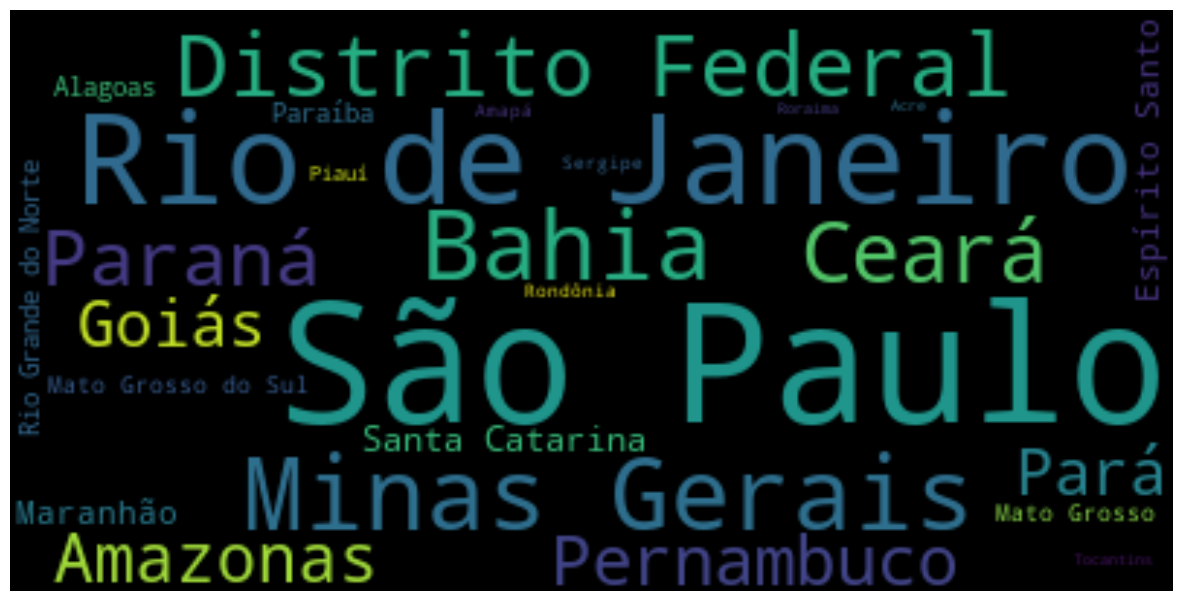

In [26]:
# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Criar um objeto wordcloud
wordcloud = WordCloud()

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear') 
ax.axis("off")    # retirando bordas e ticks

plt.show()


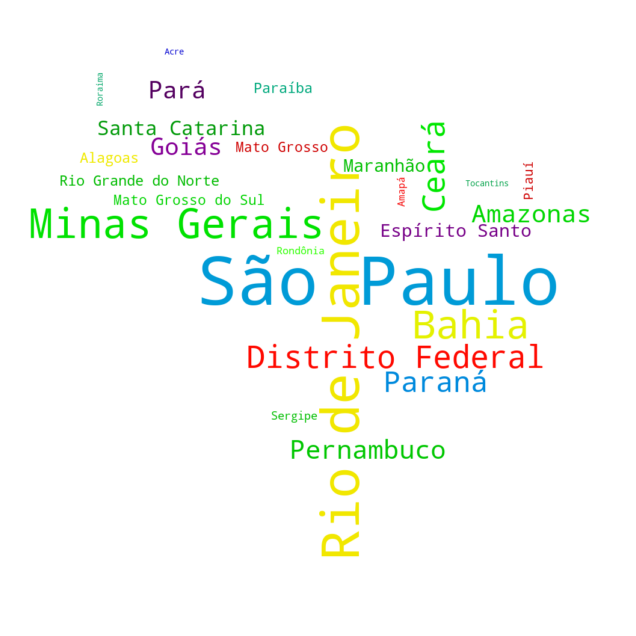

In [27]:
image_mask = ~np.array(Image.open('mapa_br.png'))
# Criar um objeto wordcloud
wordcloud = WordCloud(background_color = 'white',       # cor de fundo
                      width = image_mask.shape[1],      # largura
                      height = image_mask.shape[0],     # altura
                      mask = image_mask,                # imagem 
                      contour_color = 'white',          # cor do contorno
                      colormap = 'nipy_spectral_r')     # cor das palavras

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear') 
ax.axis("off")    # retirando bordas e ticks
plt.show()



## Aula 05 - Explorando padrões nos dados

### Desafio 1

In [32]:
dados = pd.read_csv('notas.csv')
dados.sample(5)

,Turma,Nota
43,Turma 1,72
28,Turma 1,69
58,Turma 1,77
164,Turma 2,84
261,Turma 3,69


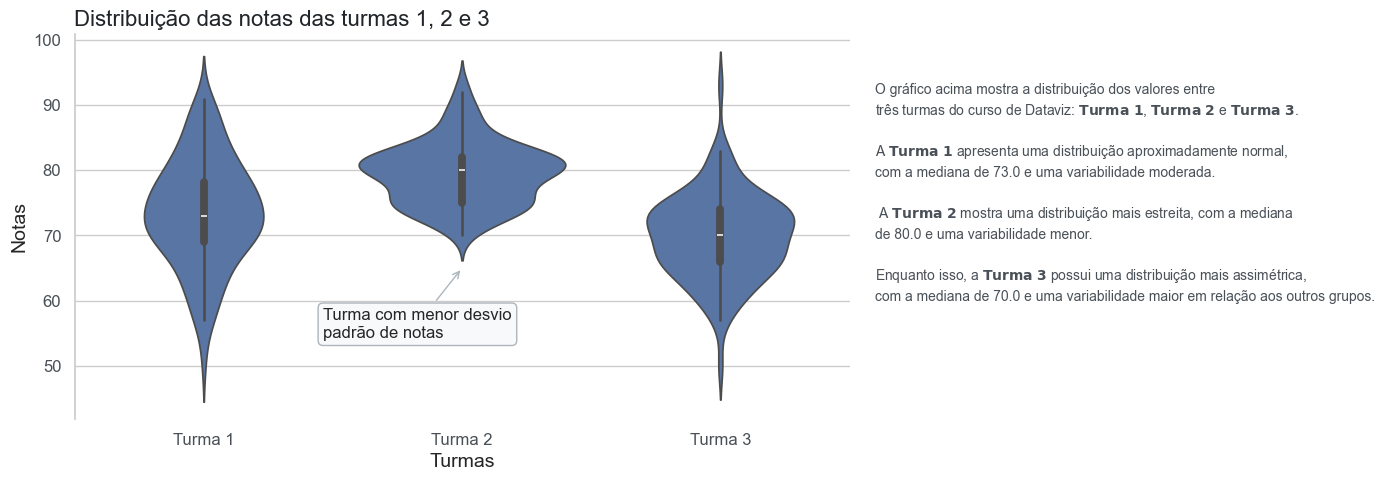

In [50]:
import numpy as np

fig, ax = plt.subplots(figsize = (10, 5))
sns.set_theme(style = 'whitegrid')

ax = sns.violinplot(data= dados, x = 'Turma', y = 'Nota')
ax.set_title('Distribuição das notas das turmas 1, 2 e 3', fontsize = 16, color = CINZA1, loc = 'left')
ax.set_xlabel('Turmas', fontsize = 14)
ax.set_ylabel('Notas', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
sns.despine(bottom = True)

ax.annotate('Turma com menor desvio\npadrão de notas', xy = (1, 65), xycoords = 'data',
            bbox = dict(boxstyle = 'round', fc = CINZA5, ec = CINZA3),
            xytext = (-100, -50), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->', color = CINZA3))

mediana = []
for i in range(1,4):
  mediana.append(dados.query(f"Turma == 'Turma {i}'").Nota.median())  

ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n' 
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()

### Desafio 2

In [55]:
df_medidas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[['comprimento', 'largura']]

Text(20.17, 4.895, 'Limite inferior\nde largura')

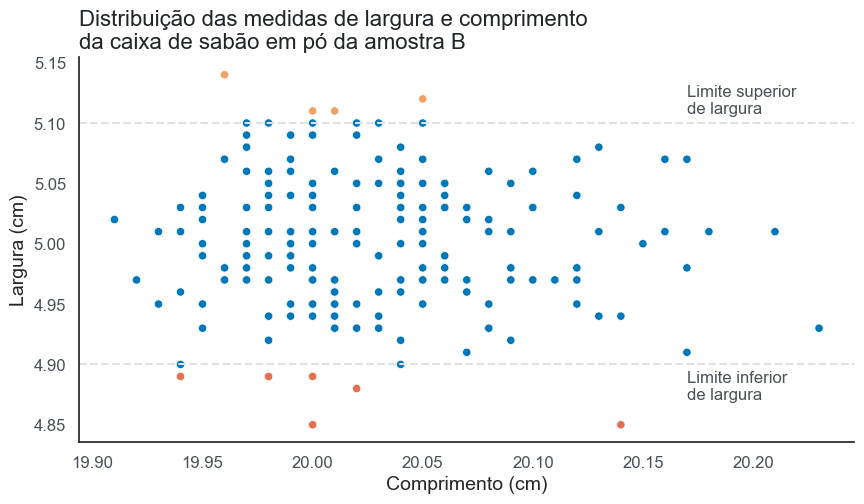

In [85]:
fix, ax = plt.subplots(figsize = (10, 5))
sns.set_theme(style = 'white')

pct = 0.02
cores = [VERMELHO1, LARANJA1, AZUL2]
acima_lim_larg = [True if l > 5 * (1 + pct) else False for l in df_b['largura']]
abaixo_lim_lar = [True if l < 5 * (1 - pct) else False for l in df_b['largura']]
map_cores = np.where(abaixo_lim_lar, cores[0], np.where(acima_lim_larg, cores[1], cores[2]))

# rejeicao = [True if (l > 5 * (1 + pct) or l < 5 * (1 - pct)) else False for l in df_b['largura']]
# map_cores = np.where(rejeicao, cores[1], cores[2])

ax = sns.scatterplot(data = df_b, x = 'comprimento', y = 'largura', color = map_cores)
ax.set_title('Distribuição das medidas de largura e comprimento\nda caixa de sabão em pó da amostra B', fontsize = 16, loc = 'left', color = CINZA1)
ax.set_xlabel('Comprimento (cm)', fontsize = 14)
ax.set_ylabel('Largura (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
sns.despine()

plt.axhline(5 + 5 * pct, color = CINZA4, linestyle = '--')
ax.text(20.17, 5.105, 'Limite superior\nde largura', fontsize = 12, color = CINZA2, va = 'bottom')

plt.axhline(5 - 5 * pct, color = CINZA4, linestyle = '--')
ax.text(20.17, 4.895, 'Limite inferior\nde largura', fontsize = 12, color = CINZA2, va = 'top') 



